In [ ]:
""""""
Single neuron model of hub neuron

""""""


In [4]:
#initialise
import matplotlib.pyplot as plt
import numpy as np 
from scipy.integrate import solve_ivp
import math as math

n = 1
endtr = 100e3 #100 s
clipt = -55*1e3
thr = 0
#gel=0.5 #nS
#gsynA=5

N0 = 0
H0 = 0
Vm0 = -65
#print( f'N0 ={N0}, H0 = {H0}, Vm0 = {Vm0}')
#print(np.size(N0))
t_span = [0,endtr] #not sure about the syntax
dt=np.arange(0,endtr,0.211)
#print(f't_span = {t_span}')
y0 = np.array([N0, H0, Vm0])
#print(f'y0 = {y0}')
#print(endtr)
#print(np.shape(t_eval))

In [5]:
def switchIC(t,y): 
    ny= np.shape(y)[0] 
    N = y[0] 
    H = y[1] 
    Vm = y[2]

    gk=0.019
    gl=0.0001
    gc=0.017
    gh=0.008

    iext =0
    #print(f'iext = {iext}, shape iext ={np.shape(iext)}')
    #Vm=np.array([1, 2, 3, 4,5])
    c=1 #nF
    phi=0.002 #/ms
    vk=-80 #mV
    vl=-40
    vca=100
    vh=-20
    vsyn=-75
    vp1=0
    vp2=20
    vp3=0
    vp4=15
    vp5=78.3
    vp6=10.5
    vp7=-42.2
    vp8=87.3

    minf=0.5*(1+np.tanh((Vm-vp1)/vp2))
    ninf=0.5*(1+np.tanh((Vm-vp3)/vp4))
    lamdn= phi*(np.cosh((Vm-vp3)/(2*vp4)))
    hinf=1/(1+np.exp((Vm+vp5)/vp6))
    tauh=(272-((-1499)/(1+np.exp((-Vm+vp7)/vp8))))
    
    ica = gc*minf*(Vm-vca)
    ik = gk*N*(Vm-vk)
    ih = gh*H*(Vm-vh)
    il = gl*(Vm-vl)  #nA

    dy=np.zeros(ny)

    dy[0]=lamdn*(ninf-N)
    dy[1]=(hinf-H)/tauh
    dy[2]=(iext-ica-il-ik-ih)/c
    return dy

In [7]:
results= solve_ivp(switchIC, t_span, y0, method='RK45', t_eval=dt, dense_output=True,
                 vectorized=True)
time=results['t']/1000
print(np.shape(time))
Vm=results['y']
print(np.shape(Vm))


(473934,)
(3, 473934)


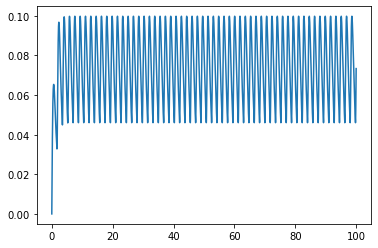

In [9]:
plt.plot(time,Vm[1])
plt.show()